Target
1.Determine the recognition accuracy (percentage of correctly classified data points) of KNN classifier on K=1,3,5
2.Determine the overall run time for computing the 1-nearest neighbor of every data in data2-test.dat.

In [1]:
import numpy as np
import numpy.linalg as la
import csv
import scipy.spatial.distance as ssd
import scipy.spatial as ss
import timeit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex
import pattrex.unit_circles as uc_rex


In [2]:
dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string

data = np.loadtxt('data/data2-train.dat', dtype=dt, comments='#', delimiter=None)

x = np.array([d[0] for d in data])#x
y = np.array([d[1] for d in data])#y
lable = np.array([d[2] for d in data])#label

X = np.vstack((x, y, lable))  # data is going to be column-wise
X.shape

# split
X_pos, X_neg = pre_rex.split_data(X, True, 2, [1.0, -1.0])
print("Positive :", X_pos.shape[1], "; Negative :", X_neg.shape[1])


Positive : 128 ; Negative : 128


<IPython.core.display.Javascript object>


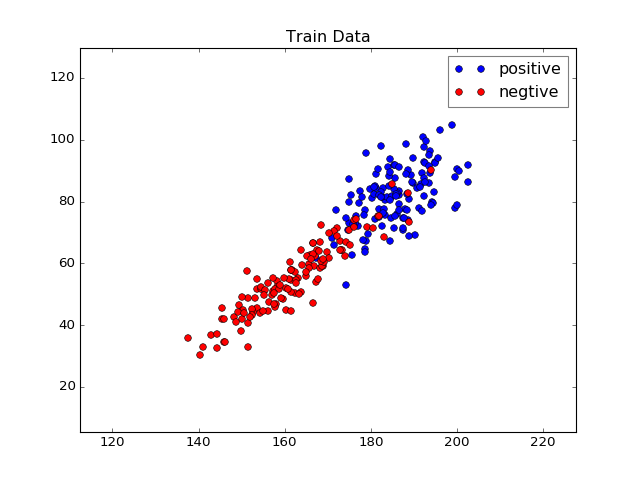

In [3]:
# plotting
fig = plt.figure()
axs = fig.add_subplot(111)

# limits for the axes
X_ = np.vstack((x, y))  # only the measurements; data is col-wise
xmin, ymin = X_.min(axis=1)
xmax, ymax = X_.max(axis=1)

xlim = [xmin-25, xmax+25]  # purely for looks
ylim = [ymin-25, ymax+25]

plt_rex.plot2d(X_pos, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="positive")
plt_rex.plot2d(X_neg, colwise_data=True, hatch='ro', x_lim=xlim, 
               y_lim=ylim, show=False, axs=axs, set_aspect_equal=False, 
               plotlabel="negtive", title="Train Data")

In [4]:
#1.Compute Nearest neighbor
#1.1 Naïve way: O(n^2) ( n*(n-1) ) for all
#https://www.researchgate.net/publication/283568278_NumPy_SciPy_Recipes_for_Data_Science_Computing_Nearest_Neighbors?channel=doi&linkId=563f695508ae45b5d28d2ea9&showFulltext=true
def nearest_neighbor_method1(X, q):
    m, n = X.shape
    minindx = 0
    mindist = np.inf
    for i in range(n):
        dist = la.norm(X[:,i] - q)
        if dist <= mindist:
            mindist = dist
            minindx = i
    return minindx

In [5]:
#1.2
def nearest_neighbor_method2(X, q):
    m, n = X.shape
    return np.argmin(np.sum((X-q.reshape(m,1))**2, axis=0))

In [6]:
#1.3
def nearest_neighbor_method3(X, q):
    X = X.T
    return np.argmin(np.sum((X - q)**2, axis=1))

In [7]:
#Method provided by the paper mentioned above
def k_nearest_neighbors(X, q, k):
    X = X.T
    sorted_inds = np.argsort(np.sum((X - q)**2, axis=1))
    return sorted_inds[:k]

In [8]:
def k_nearest_neighbors_par(X, q, k):
    X=X.T
    sorted_inds = np.argpartition(np.sum((X - q)**2, axis=1), k-1)
    return sorted_inds[:k]

In [9]:
#Or we could simply apply nearest_neighbor_mothodi k times, if k is relatively small comparing to size of X
def k_nearest_neighbors_smallk(X, q, k):
    inds=nearest_neighbor_method3(X, q)
    a_inds = np.array(inds)
    X=np.delete(X, inds, axis=1)
    for i in range(k-1):
        inds=nearest_neighbor_method2(X, q)
        a_inds=np.append(a_inds,inds)#remember to assign a pointer to new array. the return value is a pointer
        if i!=k-1:
            X=np.delete(X, inds, axis=1)
    return a_inds

In [10]:
#Test
if False:
    q = np.array([170, 66])
#     X = np.random.rand(2, 250)
    # print(X[:])
    # print(X_)
    # inds = k_nearest_neighbors_smallk(X_, q, 3)
    sorted_inds=nearest_neighbor_method2(X_, q)
    a_inds = np.array(sorted_inds)
#     print(X_[:,sorted_inds])
#     print(sorted_inds)
    X_=np.delete(X_, sorted_inds, axis=1)
    sorted_inds=nearest_neighbor_method2(X_, q)
    a_inds=np.append(a_inds,sorted_inds)
#     print(X_[:,sorted_inds])
#     print(sorted_inds)
    X_=np.delete(X_, sorted_inds, axis=1)
    sorted_inds=nearest_neighbor_method2(X_, q)
    a_inds=np.append(a_inds,sorted_inds)
#     print(X_[:,sorted_inds])
#     print(sorted_inds)
    print("3 indivisual X")
    print(a_inds)
    
    print("3 indivisul X once")
    s_inds = k_nearest_neighbors_smallk(X_,q,3)
    print(s_inds)
    
    print("sorted method")
    o_inds = k_nearest_neighbors(X_,q,3)
    print(o_inds)

In [11]:
# print(X[0:2,:])
print(X.shape[1])
for i in range(X.shape[1]):
    print("=====")
    print(i)
    print(X[0:2,i])
    X_=np.delete(X, i, axis=1)##Delete itself
    inds = k_nearest_neighbors_smallk(X_[0:2,:],X[0:2,i],5)
    #Alternative inds = k_nearest_neighbors(X_[0:2,:],X[0:2,i],5)
    print(inds)
    print(X[0:2,inds])

256
=====
0
[ 192.46335959   92.66939681]
[ 42  91  38  18 104]
[[ 184.70514548  178.29822704  177.20162659  182.60755342  180.99566577]
 [  81.49667726   67.56097074   79.42037955   81.52251193   84.96826551]]
=====
1
[ 183.21092154   75.77560296]
[ 70 190 136  67  57]
[[ 191.0803533   148.1130632   165.71469584  176.98148179  183.71431948]
 [  78.03261446   42.59380945   59.80011286   71.96531743   81.40774491]]
=====
2
[ 189.88502339   86.05353128]
[47 23 24 30 16]
[[ 179.29957975  184.07819777  190.62023129  193.81094929  188.09209416]
 [  69.42262758   91.28518656   84.44746403   89.15714746   98.74513517]]
=====
3
[ 181.90210718   77.48049394]
[ 59  69 189   1 134]
[[ 193.42993862  188.86746092  154.4244597   183.21092154  163.037288  ]
 [  85.87862592   68.75349823   51.74342888   75.77560296   55.25119835]]
=====
4
[ 199.64405026   87.85102141]
[24 20 86 26 26]
[[ 190.62023129  185.7308106   184.45388262  191.70329321  191.70329321]
 [  84.44746403   87.58105436   67.13939628  

In [12]:
#data2-test
dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string

data = np.loadtxt('data/data2-test.dat', dtype=dt, comments='#', delimiter=None)

x_t = np.array([d[0] for d in data])#x
y_t = np.array([d[1] for d in data])#y
lable_t = np.array([d[2] for d in data])#label

X_t = np.vstack((x_t, y_t, lable_t))  # data is going to be column-wise
X_t.shape

# split
X_t_pos, X_t_neg = pre_rex.split_data(X_t, True, 2, [1.0, -1.0])
print("Positive :", X_t_pos.shape[1], "; Negative :", X_t_neg.shape[1])


Positive : 48 ; Negative : 48


<IPython.core.display.Javascript object>


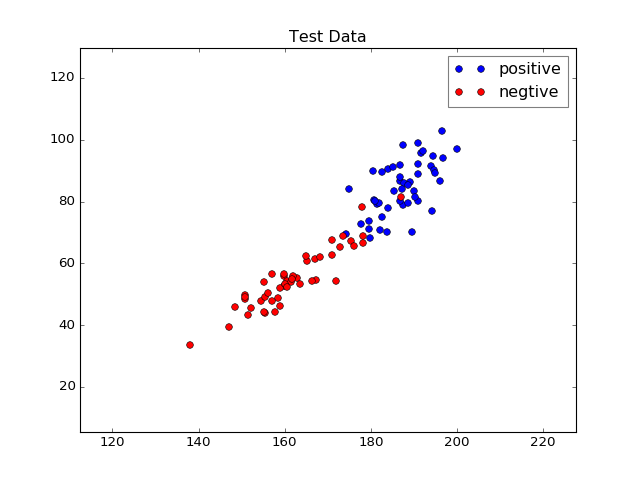

In [13]:
# plotting
fig = plt.figure()
axs = fig.add_subplot(111)

# limits for the axes
X_t_ = np.vstack((x, y))  # only the measurements; data is col-wise
xmin, ymin = X_t_.min(axis=1)
xmax, ymax = X_t_.max(axis=1)

xlim = [xmin-25, xmax+25]  # purely for looks
ylim = [ymin-25, ymax+25]

plt_rex.plot2d(X_t_pos, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="positive")
plt_rex.plot2d(X_t_neg, colwise_data=True, hatch='ro', x_lim=xlim, 
               y_lim=ylim, show=False, axs=axs, set_aspect_equal=False, 
               plotlabel="negtive", title="Test Data")

In [14]:
print(X.shape[1])
hit=0
for i in range(X_t.shape[1]):
#     print("=====")
#     print(i)
#     print(X_t[0:2,i])
    inds = k_nearest_neighbors_smallk(X[0:2,:],X_t[0:2,i],3)
    #Alternative inds = k_nearest_neighbors(X_[0:2,:],X[0:2,i],5)
#     print(inds)
#     print(X[2,inds])
#     print(np.sum(X[2,inds]))
#     print(X_t[2,i])
    #check if prediction (np.sum(X[2,inds])) matches the true lable (X_t[2,i])
#     print( np.multiply(np.sum(X[2,inds]),X_t[2,i]) )
    if np.multiply(np.sum(X[2,inds]),X_t[2,i])>0:
        hit+=1

print(hit)
print(X_t.shape[1])
print(hit/X_t.shape[1])

256
86
96
0.8958333333333334


In [15]:
def recoAccurKNN(train, test, k, method):
    hit=0
    for i in range(test.shape[1]):
#         print("=====")
#         print(i)
#         print(test[0:2,i])
#         inds = k_nearest_neighbors_smallk(train[0:2,:],test[0:2,i],k)
        if method==0:
            inds = k_nearest_neighbors(train[0:2,:],test[0:2,i],k)
        elif method==1:
            inds = k_nearest_neighbors_smallk(train[0:2,:],test[0:2,i],k)
        elif method==2:
            inds = k_nearest_neighbors_par(train[0:2,:],test[0:2,i],k)

#         print(inds)
#         print(train[2,inds])
#         print(np.sum(train[2,inds]))
#         print(test[2,i])
#         check if prediction (np.sum(train[2,inds])) matches the true lable (test[2,i])
#         print( np.multiply(np.sum(train[2,inds]),test[2,i]) )
        if np.multiply(np.sum(train[2,inds]),test[2,i])>0:
            hit+=1
    return (hit/test.shape[1])

In [16]:
i=1
while i<=21:
    for j in range(3):
        start = timeit.default_timer()
        for k in range(2):
            reco = recoAccurKNN(X,X_t,i,j)
        stop = timeit.default_timer()
        print("Rate on k =",i,", method =",j,":",reco," Time:",stop-start)
    i+=2

#Speed up using method 2.

Rate on k = 1 , method = 0 : 0.8854166666666666  Time: 0.01069805200677365
Rate on k = 1 , method = 1 : 0.8854166666666666  Time: 0.015190529986284673
Rate on k = 1 , method = 2 : 0.8854166666666666  Time: 0.006948638998437673
Rate on k = 3 , method = 0 : 0.8958333333333334  Time: 0.006913641991559416
Rate on k = 3 , method = 1 : 0.8958333333333334  Time: 0.03034836403094232
Rate on k = 3 , method = 2 : 0.8958333333333334  Time: 0.005959792993962765
Rate on k = 5 , method = 0 : 0.9375  Time: 0.008399164013098925
Rate on k = 5 , method = 1 : 0.9375  Time: 0.04075579397613183
Rate on k = 5 , method = 2 : 0.9375  Time: 0.006403468956705183
Rate on k = 7 , method = 0 : 0.9166666666666666  Time: 0.008802334021311253
Rate on k = 7 , method = 1 : 0.9270833333333334  Time: 0.05583211302291602
Rate on k = 7 , method = 2 : 0.9166666666666666  Time: 0.006096580007579178
Rate on k = 9 , method = 0 : 0.9270833333333334  Time: 0.008442066027782857
Rate on k = 9 , method = 1 : 0.9270833333333334  Tim

In [17]:
def test1NNtime(data, method):
    start = timeit.default_timer()
    for i in range(data.shape[1]):
#         print("=====")
#         print(i)
#         print(data[0:2,i])
        data_=np.delete(data, i, axis=1)##Delete itself
        if method==1:
            inds = nearest_neighbor_method1(data_[0:2,:],data[0:2,i])
        elif method==2:
            inds = nearest_neighbor_method2(data_[0:2,:],data[0:2,i])
        elif method==3:
            inds = nearest_neighbor_method3(data_[0:2,:],data[0:2,i])
#         print(inds)
#         print(data[0:2,inds])
    stop = timeit.default_timer()
    return (stop-start)


In [18]:
print("Time for method 1: ",test1NNtime(X_t,1))

print("Time for method 2: ",test1NNtime(X_t,2))

print("Time for method 3: ",test1NNtime(X_t,3))


Time for method 1:  0.10045471199555323
Time for method 2:  0.0037291879998520017
Time for method 3:  0.002258473017718643


In [19]:
print( k_nearest_neighbors(X[0:2,:],X_t[0:2,i],5) )
print( k_nearest_neighbors_smallk(X[0:2,:],X_t[0:2,i],5) )
print( k_nearest_neighbors_par(X[0:2,:],X_t[0:2,i],5))

[ 27  17  44  64 120]
[ 27  17  42  61 116]
[ 44  27  17  64 120]


In [20]:
# print(X)
q = np.array([170, 66])
k=3

In = X[0:2,:].T
sorted_inds = np.argsort(np.sum((In - q)**2, axis=1))
print(sorted_inds)
print(sorted_inds[:k])
In=X[0:2,:].T
sorted_inds = np.argpartition(np.sum((In - q)**2, axis=1), k-1, axis=-1, kind='introselect', order=None)
print(sorted_inds)
print(sorted_inds[:k])


[101 183  63 205 231 141 137 251 242 159 165 221 188 225 174 208 214 198
 247 195 197 116 140 128 246 235 144 211 226 172 199  41 106 180 142 229
 136 157 217 245  91 194  10 127  96 145 123  22  67 110 121  47 130 236
 151 212 152 255  65   9 150 178 239 249 131 181 154 134 114 241 139  98
  40  14 185 103 218 132  86 224 126  68 138  38 192  31  71 162   1   3
 164 196  58 200 230 219  82 252  49 146  60 206 168  76  50  92 113 209
 216 203  12   7  69 148  51  46 117 173  11  99 253 105  95  18 233  36
 243 237 100  81 147 222  53  57 240 215 228  73 189   8  42  84  87  62
 112 187  74 104 254  13  37 124 158 119 234   6 201 177  75 167 191  83
  77  28  32 238  70 122  56 143 133 204 160  35 244 220  61 155  20 166
 210 118 125  52  24  79 207  66  80  48   2 176  33 193 227  23 120 153
  26 248 232  17  45  55 107  97 213  78  64  59  85  44 149 170 102  54
  27 190 129 108 223  30 156 202   5 184  72 186  93  43   0  39  19   4
 109  16 169  88  15  89 171  94  21  25 179 163 16

In [21]:
# print(X[0:2,:].T)
tree = ss.KDTree(X[0:2,:].T,4)
print(tree.data)
q = np.array([170, 66])
k=3
tree.query(q,k)

[[ 192.46335959   92.66939681]
 [ 183.21092154   75.77560296]
 [ 189.88502339   86.05353128]
 [ 181.90210718   77.48049394]
 [ 199.64405026   87.85102141]
 [ 182.27801996   97.85690247]
 [ 186.53889539   82.1419026 ]
 [ 177.57904752   83.41263326]
 [ 186.60526179   79.09003003]
 [ 176.5276708    75.38266981]
 [ 174.82456894   73.17893503]
 [ 183.4073523    80.51869803]
 [ 186.19321256   75.86175769]
 [ 175.01687581   87.43195874]
 [ 182.6449658    71.93370844]
 [ 193.66271212   96.2259725 ]
 [ 188.09209416   98.74513517]
 [ 189.27137525   88.54146733]
 [ 182.60755342   81.52251193]
 [ 195.01550352   92.66265986]
 [ 185.7308106    87.58105436]
 [ 200.0657219    90.53880551]
 [ 178.95909799   67.19336267]
 [ 184.07819777   91.28518656]
 [ 190.62023129   84.44746403]
 [ 200.57294907   89.96404339]
 [ 191.70329321   85.71354653]
 [ 191.84944485   89.33322491]
 [ 188.83244181   80.81332262]
 [ 202.62948453   91.7466985 ]
 [ 193.81094929   89.15714746]
 [ 185.40985092   71.35711736]
 [ 186.5

(array([ 1.44066251,  1.99426948,  2.41227018]), array([101, 183,  63]))

In [22]:
print(X[0:2,:].shape[0])

2


In [341]:
#building a kD-tree for X ⊂ R
#function KDTREE(X, depth)
# if |X| = 0 return
# d ← k mod depth // determine split dimension
# i ← argmedianhed, xi
# node.split xi
# node.lft ← KDTREE(
# node.rgt ← KDTREE(
# return node
# Splitting dimension:
#   1. alternate between the x and the y dimension
#   2. split the data along the dimension of higher variance
# Compute the split point:
#   1. split at the midpoint of the data
#   2. split at the median of the data
class Node:
    def __init__(self, split, left, right, sliceDimension, bound):
        self.split = split
        self.left = left
        self.right = right
        self.sliceDimension = sliceDimension
        self.bound = bound #NOTE: The bounding box here is not determined by the max and min of this part of data, it is deciede by the whole data
                
global_counter=0#For debug
        
def KDTree(X, depth, dim, splt, bound=None):
    print("Depth:",depth)
    global global_counter  #For debug
    global_counter=global_counter+1#For debug
#     print(X.shape[0])
    n, k = X.shape
    print("The number of points is:", n, "The dimension is:", k)
    if(n==0):
        print("n:",n,"###Stopped by n, depth is ", depth)
        return None
    
    if(depth>=20):#safety valve, remove if everything is checked.
        print(depth,"!!!Stopped by depth valve. n is ",n)
        return None
    
    #Dimension selection
    if(dim==0): #Alternate betwenn x and y
        slcDim = depth % k  #refactor d as slcDim sliceDimension
    elif(dim==1): #Split along dimension of higer variance
        #         print(X[:,0]) # first dimension
        #         print(X[:,1]) # second dimension
        #         print( np.var(X[:,0], axis=0))
        #         print( np.var(X[:,1], axis=0))
        slcDim = np.argmax( np.var(X[:,:], axis=0) )        
    else:
        print("dim should be either 1:Alternate or 2:Highest variance")
    print("SliceDimension: ",slcDim)
    
    #Split point selection
    if(splt==0):#Median
        j = np.median(X[:,slcDim])
        if (bound==None):#bound==None
            bound = np.stack((np.amax(X,axis=0),np.amin(X,axis=0)),axis=0)
        i = np.average(np.stack((np.amax(X,axis=0),np.amin(X,axis=0)),axis=0),axis=0)
        i[slcDim]=j
        #Design Choice: Since we calculate the median by only one axis
        #if the number of data is even, we would get the result as the sum of the very middle two points 
        #on the desinated axis, but simply interpolate the unused axis is meaningless, I then store nothing but the 
        #desinated axis. But in order to get a clean result, we use the middle point method on those axises.      
    elif(splt==1):#Midpoint, middle of the bounding box
        if (bound==None):#bound==None
            bound = np.stack((np.amax(X,axis=0),np.amin(X,axis=0)),axis=0)
        i=np.average(bound,axis=0)
#         i=np.average(np.stack((np.amax(X,axis=0),np.amin(X,axis=0)),axis=0),axis=0)
    elif(splt==2):#sliding-Midpoint #OPTIONAL
        if (bound==None):#bound==None
            bound = np.stack((np.amax(X,axis=0),np.amin(X,axis=0)),axis=0)
        i=np.average(bound,axis=0) #First mid point
        print("i",i)
        less_idx = np.nonzero(X[:,slcDim] <= i[slcDim])[0]
        greater_idx = np.nonzero(X[:,slcDim] > i[slcDim])[0]
        print("i[slcDim],",i[slcDim])
        print(less_idx)
        print(greater_idx)
        
        ################
        if len(less_idx) == 0:
#             print(X[:,slcDim])
            i = np.amin(X,axis=0)
#             print("Sliding i",i[slcDim])
            less_idx = np.nonzero(X[:,slcDim] <= i[slcDim])[0]
            greater_idx = np.nonzero(X[:,slcDim] > i[slcDim])[0]
        if len(greater_idx) == 0:
            i = np.amax(X,axis=0)
            less_idx = np.nonzero(X[:,slcDim] < i[slcDim])[0]
            greater_idx = np.nonzero(X[:,slcDim] >= i[slcDim])[0]
        if len(less_idx) == 0:
            print("Face it!")
#             # _still_ zero? all must have the same value
#             if not np.all(X[:,slcDim] == X[:,slcDim][0]):
#                 raise ValueError("Troublesome data array: %s" % X[:,slcDim])
#             i = X[:,slcDim][0]
#             less_idx = np.arange(len(X[:,slcDim])-1)
#             greater_idx = np.array([len(X[:,slcDim])-1])
        ################
        
    else:
        print("splt should be either 1:Midpoint or 2:Median")
    
    if(n>1):#Split the array
    
        psu_lb=np.copy(bound)
        psu_rb=np.copy(bound)
        psu_lb[0,slcDim]=i[slcDim]
        psu_rb[1,slcDim]=i[slcDim]   
        
        if(n%2==0):
            M = X[:,slcDim] <= i[slcDim]
            left, right = X[M], X[~M]
        elif(n%2==1):
            L = X[:,slcDim] < i[slcDim]
            R = X[:,slcDim] > i[slcDim]
            left, right = X[L], X[R]

        return Node(i, 
                    KDTree(left, depth+1, dim, splt, psu_lb), 
                    KDTree(right, depth+1, dim, splt, psu_rb),
                    slcDim,
                    bound
                    )
    else:
        return Node(i, 
            None,
            None,
            slcDim,
            bound
            )
# Tree1=KDTree(X[0:2,:].T,0,0,0)  #Take rowwise data a.k.a (x,y) in same row. KDTree(X, depth, dim, splt):
# Tree2=KDTree(X[0:2,:].T,0,0,1)
# Tree3=KDTree(X[0:2,:].T,0,1,0)
# Tree4=KDTree(X[0:2,:].T,0,1,1)
#Tree5=KDTree(X[0:2,:].T,0,0,2)

In [342]:
print("Tree", Tree)
print("Tree.sliceDimension", Tree.sliceDimension)
print("Tree.bound", Tree.bound)
print("Tree.split", Tree.split)
print("Tree.left: ", Tree.left)
print("Tree.left.split: ", Tree.left.split)
print("Tree.left.bound: ", Tree.left.bound)
print("Tree.right: ", Tree.right)
print("Tree.right.split: ", Tree.right.split)
print("Counter", global_counter)

Tree <__main__.Node object at 0x10c260358>
Tree.sliceDimension 1
Tree.bound [[ 202.65521308  104.69737551]
 [ 137.45442865   30.39378981]]
Tree.split [ 170.05482086   67.54558266]
Tree.left:  <__main__.Node object at 0x107cfff60>
Tree.left.split:  [ 160.95415563   48.88774123]
Tree.left.bound:  [[ 202.65521308   67.54558266]
 [ 137.45442865   30.39378981]]
Tree.right:  <__main__.Node object at 0x10c260e10>
Tree.right.split:  [ 185.55962954   86.12917312]
Counter 0


In [364]:
def KDTreePlotBranch2D(Node, axs):
#     global global_traverseCounter
#     if(global_traverseCounter>4096):
#         print("!!!Exit")
#         return
#     else:
#         global_traverseCounter=global_traverseCounter+1

    if(Node==None):
        return
    
    if(axs==None):
        fig = plt.figure(figsize=(12, 12))
        axs = fig.add_subplot(221)
        
    axisMax = np.amax(Node.bound[:,~Node.sliceDimension])
    axisMin = np.amin(Node.bound[:,~Node.sliceDimension])
    midPoint = Node.split[Node.sliceDimension]
    print(Node.bound)
    print("max", axisMax,"min", axisMin, "mid",midPoint )
    # plt.plot([axisMin, axisMax], [midPoint, midPoint], color='b', linestyle='-', linewidth=1)

    if Node.sliceDimension==0:
        axs.plot([midPoint, midPoint], [axisMin, axisMax], color='b', linestyle='-', linewidth=1)
    elif Node.sliceDimension==1:
        axs.plot([axisMin, axisMax], [midPoint, midPoint], color='g', linestyle='-', linewidth=1)
    
    KDTreePlotBranch2D(Node.left,axs)
    KDTreePlotBranch2D(Node.right,axs)
    return

In [365]:
def KDTreeTraverse(Node):
    global global_traverseCounter
    if(global_traverseCounter>4096):
        print("Exit")
        return
    else:
        global_traverseCounter=global_traverseCounter+1

    if(Node==None):
        return
    
    print(Node.bound)
    
    print("Go Left")
    KDTreeTraverse(Node.left)
    print("Go Right")
    KDTreeTraverse(Node.right)
    return

In [369]:
def KDTreePlot2D(TreeList, dim, splt):
# def KDTreePlot2D(Node1,Node2,Node3,Node4):
    
    #Four variants of KDTree
    fig = plt.figure(figsize=(12, 8))
    axsList=[]
    
#     for i in range(dim):
#         for j in range(splt):
#             axsList[dim][splt]=fig.add_subplot(dim, splt ,i+1)
    for i in range(TreeList.__len__()):
        axsList.append(fig.add_subplot(dim, splt ,i+1))

    # plotting the base scatter points
    # limits for the axes
    X_ = np.vstack((x, y))  # only the measurements; data is col-wise
    xmin, ymin = X_.min(axis=1)
    xmax, ymax = X_.max(axis=1)

    xlim = [xmin, xmax]  # purely for looks
    ylim = [ymin, ymax]
    
    plt_rex.plot2d(X_, colwise_data=True, hatch='ro', x_lim=xlim, 
                   y_lim=ylim, show=False, axs=axsList[0], set_aspect_equal=False, 
                   title="Alternative and Median")
    plt_rex.plot2d(X_, colwise_data=True, hatch='ro', x_lim=xlim, 
                   y_lim=ylim, show=False, axs=axsList[1], set_aspect_equal=False, 
                   title="Alternative and MidPoint")
    plt_rex.plot2d(X_, colwise_data=True, hatch='ro', x_lim=xlim, 
                   y_lim=ylim, show=False, axs=axsList[2], set_aspect_equal=False, 
                   title="Alternative and SlidingMidPoint")
    plt_rex.plot2d(X_, colwise_data=True, hatch='ro', x_lim=xlim, 
                   y_lim=ylim, show=False, axs=axsList[3], set_aspect_equal=False, 
                   title="High Variance and Median")
    plt_rex.plot2d(X_, colwise_data=True, hatch='ro', x_lim=xlim, 
                   y_lim=ylim, show=False, axs=axsList[4], set_aspect_equal=False, 
                   title="High Variance and MidPoint")
    plt_rex.plot2d(X_, colwise_data=True, hatch='ro', x_lim=xlim, 
                   y_lim=ylim, show=False, axs=axsList[5], set_aspect_equal=False, 
                   title="High Variance and SlidingMidPoint")
    
#     for i in range(dim):
#         for j in range(splt):
# #             KDTreePlotBranch2D(TreeList[i*dim+j],axsList[i][j])
# #             axsList[dim][splt]=fig.add_subplot(dim, splt ,i+1)

    
    for i in range(TreeList.__len__()):
        KDTreePlotBranch2D(TreeList[i],axsList[i])
#     KDTreePlotBranch2D(Node1,axs1)
#     KDTreePlotBranch2D(Node2,axs2)
#     KDTreePlotBranch2D(Node3,axs3)
#     KDTreePlotBranch2D(Node4,axs4)

    
    
    return

In [367]:
TreeList=[]
for dim in range(2):
    for splt in range(3):
        print(dim, splt)
        TreeList.append(KDTree(X[0:2,:].T,0,dim,splt))
# TreeList.append(KDTree(X[0:2,:].T,0,0,1))

0 0
Depth: 0
The number of points is: 256 The dimension is: 2
SliceDimension:  0
Depth: 1
The number of points is: 128 The dimension is: 2
SliceDimension:  1
Depth: 2
The number of points is: 64 The dimension is: 2
SliceDimension:  0
Depth: 3
The number of points is: 32 The dimension is: 2
SliceDimension:  1
Depth: 4
The number of points is: 16 The dimension is: 2
SliceDimension:  0
Depth: 5
The number of points is: 8 The dimension is: 2
SliceDimension:  1
Depth: 6
The number of points is: 4 The dimension is: 2
SliceDimension:  0
Depth: 7
The number of points is: 2 The dimension is: 2
SliceDimension:  1
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 7
The number of points is: 2 The dimension is: 2
SliceDimension:  1
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 6
The n

/Users/kangcifong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:57: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/Users/kangcifong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:66: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


The dimension is: 2
SliceDimension:  0
Depth: 7
The number of points is: 2 The dimension is: 2
SliceDimension:  1
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 7
The number of points is: 2 The dimension is: 2
SliceDimension:  1
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 5
The number of points is: 8 The dimension is: 2
SliceDimension:  1
Depth: 6
The number of points is: 4 The dimension is: 2
SliceDimension:  0
Depth: 7
The number of points is: 2 The dimension is: 2
SliceDimension:  1
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
Depth: 7
The number of points is: 2 The dimension is: 2
SliceDimension:  1
Depth: 8
The number of points is: 1 The dimension is: 2
Slice

/Users/kangcifong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:71: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


6


<IPython.core.display.Javascript object>


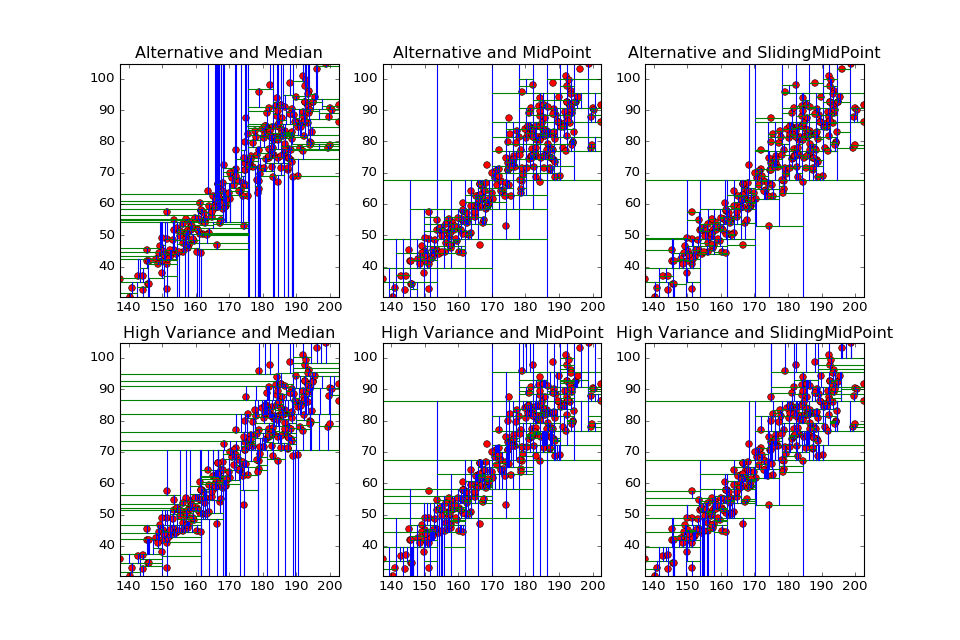

[[ 202.65521308  104.69737551]
 [ 137.45442865   30.39378981]]
max 104.697375506 min 30.393789814 mid 175.7309
[[ 175.7309      104.69737551]
 [ 137.45442865   30.39378981]]
max 175.7309 min 137.454428648 mid 54.1096221186
[[ 175.7309       54.10962212]
 [ 137.45442865   30.39378981]]
max 54.1096221186 min 30.393789814 mid 154.341867335
[[ 154.34186733   54.10962212]
 [ 137.45442865   30.39378981]]
max 154.341867335 min 137.454428648 mid 42.592007231
[[ 154.34186733   42.59200723]
 [ 137.45442865   30.39378981]]
max 42.592007231 min 30.393789814 mid 145.914920106
[[ 145.91492011   42.59200723]
 [ 137.45442865   30.39378981]]
max 145.914920106 min 137.454428648 mid 35.2259084873
[[ 145.91492011   35.22590849]
 [ 137.45442865   30.39378981]]
max 35.2259084873 min 30.393789814 mid 142.645593837
[[ 142.64559384   35.22590849]
 [ 137.45442865   30.39378981]]
max 142.645593837 min 137.454428648 mid 31.7293475974
[[ 142.64559384   31.7293476 ]
 [ 137.45442865   30.39378981]]
max 31.7293475974

In [370]:
print(TreeList.__len__())
global_traverseCounter=0
KDTreePlot2D(TreeList, 2, 3)